In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
sns.set_theme(style="darkgrid")

In [3]:
TEST_DIR = 'C:/Users/marat/tests/'

# Получаем данные

In [4]:
DATA_DIR = 'C:/Users/marat/mfk_2024/'

In [5]:
df = pd.read_csv(f'{DATA_DIR}flights_NY.csv')

In [6]:
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762


In [7]:
raw_df_len = len(df)

Удаляем строки с пропущенными значениями

In [8]:
df = df.dropna()

In [9]:
print(f"\nудалено строк с пустыми значениями: {raw_df_len - len(df)}\n")


удалено строк с пустыми значениями: 9430



In [10]:
df[['dep_delay', 'arr_delay', 'air_time', 'distance']].describe()

,dep_delay,arr_delay,air_time,distance
count,327346.000000,327346.000000,327346.000000,327346.000000
mean,12.555156,6.895377,150.686460,1048.371314
std,40.065688,44.633292,93.688305,735.908523
min,-43.000000,-86.000000,20.000000,80.000000
25%,-5.000000,-17.000000,82.000000,509.000000
50%,-2.000000,-5.000000,129.000000,888.000000
75%,11.000000,14.000000,192.000000,1389.000000
max,1301.000000,1272.000000,695.000000,4983.000000


# Задание №1

### a) По каждой авиакомпании оцените вероятность того, что задержка прилета будет положительной

In [11]:
df_delays = df[['carrier', 'flight', 'arr_delay']].copy()

In [12]:
df_delays['is_pos_delay'] = df_delays['arr_delay'].apply(lambda x: 1 if x > 0 else 0)

In [13]:
df_delays.pivot_table(
    index='carrier', columns='is_pos_delay', values='arr_delay', aggfunc='count'
).assign(flights_total = lambda x: x[0] + x[1]
).assign(prob_of_positive_delay = lambda x: x[1] / x['flights_total']
).sort_values('prob_of_positive_delay')

is_pos_delay,0,1,flights_total,prob_of_positive_delay
carrier,,,,
AS,520,189,709,0.266573
HA,245,97,342,0.283626
AA,21241,10706,31947,0.335118
VX,3370,1746,5116,0.341282
DL,31245,16413,47658,0.344391
OO,19,10,29,0.344828
US,12482,7349,19831,0.370581
9E,10657,6637,17294,0.383775
UA,35560,22222,57782,0.384583


### б) Нарисуйте график, показывающий распределение вероятности положительной задержки по авиакомпаниям

In [14]:
df_pos_delays = df_delays.query('is_pos_delay == 1').copy()

In [15]:
df_pos_delays[['arr_delay']].describe().reset_index()

,index,arr_delay
0,count,133004.000000
1,mean,40.342501
2,std,53.346334
3,min,1.000000
4,25%,8.000000
5,50%,21.000000
6,75%,51.000000
7,max,1272.000000


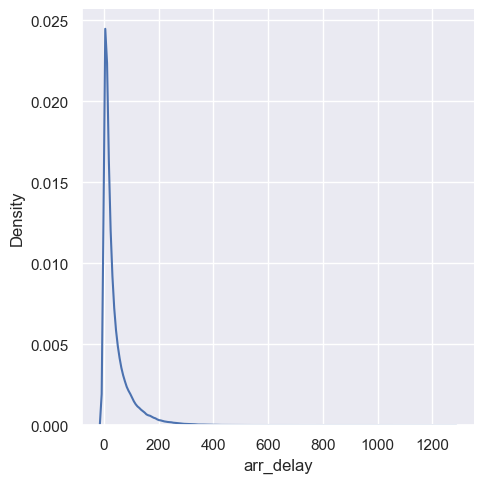

In [16]:
sns.displot(df_pos_delays, x="arr_delay", kind="kde")

# Задание №2

### a) Постройте гистограмму расстояния перелета distance. Выделите на ней три группы перелетов: короткие, средние и длинные.

In [17]:
df[['distance']].describe()

,distance
count,327346.000000
mean,1048.371314
std,735.908523
min,80.000000
25%,509.000000
50%,888.000000
75%,1389.000000
max,4983.000000


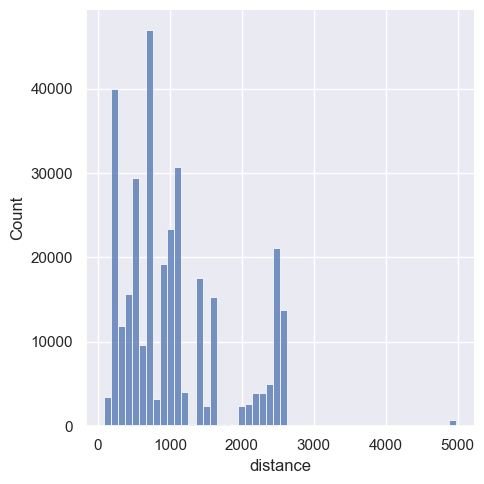

In [18]:
sns.displot(df, x='distance', bins=50)

### б) Какие значения distance разумно выбрать в качестве границы, разделяющей короткие. средние и длинные перелеты?

Разбиение distance на группы задаем по результатам визуального анализа гистограммы

In [19]:
def calc_distance_range(row):
    if row['distance'] <= 1000:
        return 'короткие'
    elif row['distance'] <= 3000:
        return 'средние'
    else:
        return 'длинные'

In [20]:
df['distance_range'] = df.apply(calc_distance_range, axis=1)

In [21]:
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,distance_range
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,средние
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,средние
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,средние
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,средние
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,короткие


In [22]:
df.pivot_table(index='distance_range', values='flight', aggfunc='count')

,flight
distance_range,
длинные,709
короткие,182594
средние,144043


### в) Куда летят самолеты в группе длинных перелетов?

In [23]:
df.query('distance_range == "длинные"'
).pivot_table(
    index='dest',
    values='flight',
    aggfunc='count'
)

,flight
dest,
ANC,8
HNL,701


### г) Найдите среднее время задержки вылета в каждой из трех выделенных групп. 


In [24]:
df.query('dep_delay > 0'
).pivot_table(
    index='distance_range',
    values='dep_delay',
    aggfunc='mean'
)

,dep_delay
distance_range,
длинные,29.685315
короткие,43.359241
средние,34.375425


# Задание №3

### а) Нарисуйте график среднего времени задержки вылета по месяцам и отметьте на нем границы доверительных интервалов с уровнем доверия 0.95.

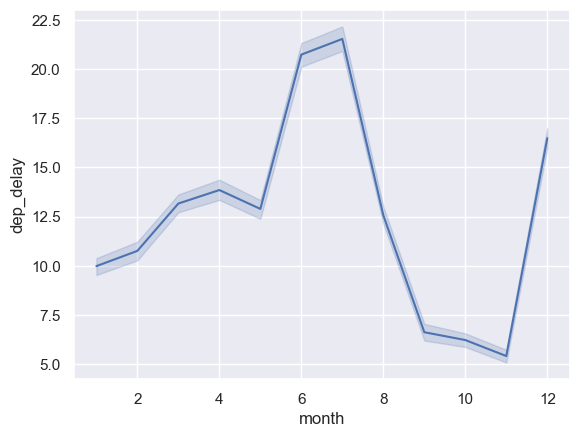

In [25]:
ax = sns.lineplot(data=df, x='month', y='dep_delay', estimator='mean', errorbar=('ci', 95))

### б) С помощью подходящего статистического теста проверьте, можно ли принять гипотезу о равенстве средних в январе и феврале на уровне значимости 0.05? на уровне значимости 0.01? 

Гипотеза: средние января и февраля различаются.
  - Нулевая гипотеза (Н₀): среднее значение января РАВНО среднему значению февраля;
  - Альтернативная гипотеза (Н₁): среднее значение января НЕ РАВНО среднему значению февраля.

In [26]:
for key, value in {1: 'январе', 2: 'феврале'}.items():
    n = len(df.query('month == @key')[['dep_delay']])
    print(f"\nКоличество наблюдений в {value}: {n}")


Количество наблюдений в январе: 26398

Количество наблюдений в феврале: 23611


Используем t-тест для проверки гипотезы, так как n достаточно велико.

In [27]:
TtestResult = stats.ttest_ind (
    a=df.query('month == 1')[['dep_delay']], 
    b=df.query('month == 2')[['dep_delay']],
    equal_var=False
)

In [28]:
print('p-значение:', TtestResult.pvalue[0])

p-значение: 0.016989443595194147


In [29]:
for alpha in [.05, .01]:
    if (TtestResult.pvalue[0] < alpha):
        print(f"\nПри уровне значимости {alpha} отвергаем нулевую гипотезу --> средние не равны")
    else:
        print(f"\nПри уровне значимости {alpha} не получилось отвергнуть нулевую гипотезу --> средние могут быть равны")


При уровне значимости 0.05 отвергаем нулевую гипотезу --> средние не равны

При уровне значимости 0.01 не получилось отвергнуть нулевую гипотезу --> средние могут быть равны


# Задание №4

### а) Найдите коэффициент корреляции между расстоянием distance и временем полета air_time.

In [30]:
print(f"\nКоэффициент корреляции между расстоянием и временем полета: {np.corrcoef(df['distance'], df['air_time'])[0][1]}")


Коэффициент корреляции между расстоянием и временем полета: 0.9906496472248582


Коэффициент корреляции равен почти 1, что говорит о наличии сильной, почти линейной взаимосвязи между рядами, что вполне логично при описании зависимости времени полета от расстояния

### б) Постройте точечную диаграмму в осях distance (х) и air_time (y). Найдите коэффициенты линейной регрессии и нанесите полученную прямую на график. Как можно интерпретировать смысл коэффициентов полученной линейной модели?


In [31]:
res = stats.linregress(df['distance'], df['air_time'])

In [32]:
res

LinregressResult(slope=0.12611932467386067, intercept=18.466578127760357, rvalue=0.9906496472248583, pvalue=0.0, stderr=3.0357833082095988e-05, intercept_stderr=0.03888460539304109)

In [33]:
print (f"\nНаклон линии линейной регресии: {res.slope},\nПересечение с осью Х: {res.intercept}")


Наклон линии линейной регресии: 0.12611932467386067,
Пересечение с осью Х: 18.466578127760357


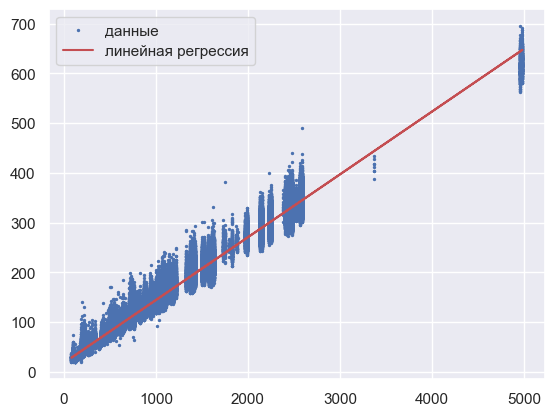

In [34]:
plt.scatter(
    x=df['distance'],
    y=df['air_time'],
    s=2,
    label='данные'
)

plt.plot(df['distance'], res.intercept + res.slope * df['distance'], 'r', label='линейная регрессия')

plt.legend()

plt.show()

1) Коэффициент наклона линии линейной регрессии показывает величину изменения зависимой переменной при изменении независимой переменной на 1;
2) Сдвиг линии (точка пересечения линии регрессии с осью Х) показывает среднее значение зависимой переменной, когда независимая равна 0.

# Задание №5

### а) Постройте нормированную гистограмму распределения задержки прилета по тем рейсам, которые вылетели в пределах +/-15 минут от времени в расписании. Сделайте предположение о том, каким распределением может описываться полученная гистограмма, оцените параметры этого распределения и нанесите график плотности на график с гистограммой.

In [35]:
df.query('abs(dep_delay) <= 15')['arr_delay'].describe()

count    256608.000000
mean         -8.251115
std          17.907215
min         -86.000000
25%         -20.000000
50%         -10.000000
75%           1.000000
max         194.000000
Name: arr_delay, dtype: float64

<Axes: xlabel='arr_delay', ylabel='Density'>

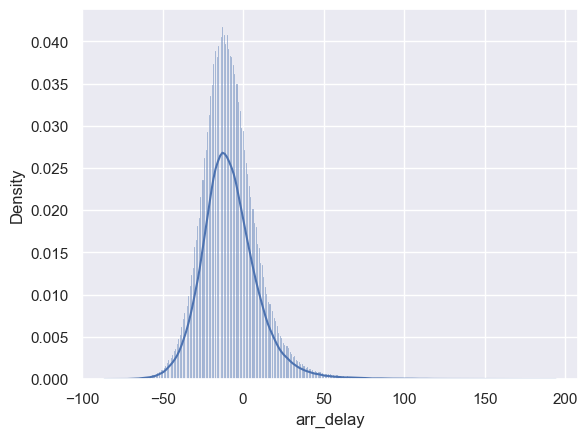

In [36]:
sns.histplot(df.query('abs(dep_delay) <= 15')['arr_delay'], kde=True, stat="density")

In [37]:
print(
    f"\nМат. ожидание: {df.query('abs(dep_delay) <= 15')['arr_delay'].mean()},\
    \nМода: {df.query('abs(dep_delay) <= 15')['arr_delay'].mode()[0]},\
    \nМедиана: {df.query('abs(dep_delay) <= 15')['arr_delay'].median()}"
)


Мат. ожидание: -8.251114540466393,    
Мода: -13.0,    
Медиана: -10.0


Мат. ожидание, мода и медиана, почти, равны, а также учитывая колоколообразную форму графика плотности, можно предположить, что распределение является **нормальным**. Параметры нормального распределения - математическое ожидание и дисперсия

In [38]:
print(
    f"\nМат. ожидание: {df.query('abs(dep_delay) <= 15')['arr_delay'].mean()},\
    \nДисперсия: {df.query('abs(dep_delay) <= 15')['arr_delay'].std()}"
)


Мат. ожидание: -8.251114540466393,    
Дисперсия: 17.907214960280736


#### б) С помощью подходящего статистического теста проверьте, можно ли принять гипотезу о выбранном распределении?

Проверим гипотезу о нормальности распределения при помощи теста Колмогорова-Смирнова:

In [39]:
stats.kstest(
    df.query('abs(dep_delay) <= 15')['arr_delay'],
    'norm',
    args=(
        df.query('abs(dep_delay) <= 15')['arr_delay'].mean(),
        df.query('abs(dep_delay) <= 15')['arr_delay'].std()
    )
)

KstestResult(statistic=0.06353745240085662, pvalue=0.0, statistic_location=-3.0, statistic_sign=1)

Видим, что p_value = 0 --> Гипотеза о нормальности **отвергается**

# Задание №6

### а) Постройте модель логистической регрессии, которая будет предсказывать, что задержка прилета составит более 15 минут. Какие признаки вы будете использовать? Какова точность полученной модели (precision, recall, accuracy)?

Для моделирования будем использовать библиотеку sklearn, откуда импортируем процедуры:
 - train_test_split - разделение выборки на обучающую и тестовую выборки;
 - LogisticRegression - обучение модели логистическая регрессия;
 - metrics - получение метрик обученной модели

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Создадим в датасете поле классов: 1 - рейс задержался более, чем на 15 минут; 0 - задержка менее 15 минут

In [41]:
df['is_arr_delay_15m_plus'] = df['arr_delay'].apply(lambda x: 1 if x > 15 else 0)

In [42]:
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,distance_range,is_arr_delay_15m_plus
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,средние,0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,средние,1
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,средние,1
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,средние,0
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,короткие,0


Создадим несколько наборов признаков, которые, интуитивно, могут опосредовать опоздания, на этих наборах обучим логистическую регрессию и, замерив точность для каждого варианта набора, определим какой из наборов дает более точные предсказания.

In [43]:
factors = [
    ['dep_delay', 'distance'],
    ['dep_delay', 'air_time'],
    ['air_time', 'distance'],
    ['dep_delay', 'distance', 'air_time']
]

In [44]:
y = df['is_arr_delay_15m_plus']

In [45]:
model_metrics = pd.DataFrame([])
i = 0
for x in factors:
    model_metrics_row = {}
    X = df[x]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
    log_regression = LogisticRegression()
    log_regression.fit(X_train, y_train)
    y_pred = log_regression.predict(X_test)
    model_metrics_row.update({
        'factors': str(x),
        'accuracy': metrics.accuracy_score(y_test, y_pred),
        'precision': metrics.precision_score(y_test, y_pred),
        'recall_score': metrics.recall_score(y_test, y_pred)
    })
    model_metrics_row = pd.DataFrame(model_metrics_row, index=[i])
    model_metrics = pd.concat([model_metrics, model_metrics_row], sort=False)
    i+=1

In [46]:
model_metrics

,factors,accuracy,precision,recall_score
0,"['dep_delay', 'distance']",0.900931,0.880162,0.673063
1,"['dep_delay', 'air_time']",0.900768,0.880654,0.671772
2,"['air_time', 'distance']",0.769643,0.766982,0.038377
3,"['dep_delay', 'distance', 'air_time']",0.913619,0.892303,0.722196


Как видно, наиболее высокие метрики точности демонстрирует набор признаков №3:
 - accuracy = .91  - 91% результатов, предсказанных моделью, соответствует тестовой выборке;
 - precision = .89 - правильно предсказано 89% истинно негативных классов;
 - recall_score = .72 - правильно предсказано 72% истинно положительных классов.

Отдельно следует сказать, что при исключении из набора признака dep_delay резко ухудшаются метрики ([0, 1]), что говорит о том, что опоздание с вылетом - один из весомых факторов, определяющих опоздание с прилетом